In [1]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import e_all_fullgts_stats as parent_script
import _config

design_df = pd.read_csv(_config.DATA_DIR + 'exp_design.csv')

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/data/


In [2]:
ddf = dict()
mdf = pd.DataFrame()
for nm in design_df['Short name']:
    df = pd.read_csv(parent_script.out_dir + f'{nm}.csv', index_col = 0)
    df['Condition'] = nm
    df = df[['Condition', 'Count']]
    ddf[nm] = df
    
    mdf = mdf.append(df, ignore_index = True)
    print(nm)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


## num. unique

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 <a list of 99 Text xticklabel objects>)

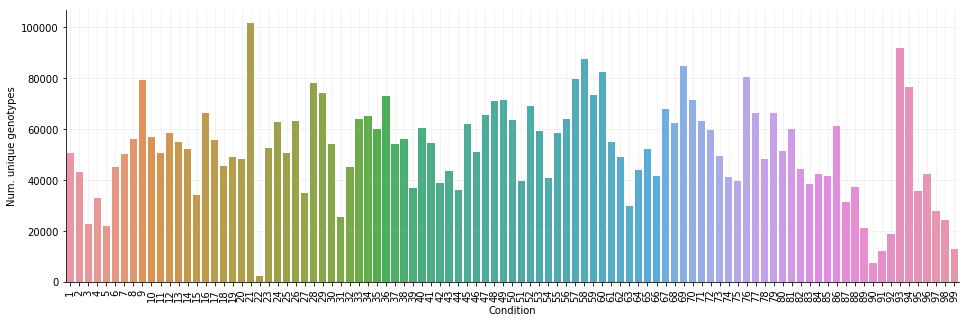

In [10]:
fig, ax = plt.subplots(figsize = (16, 5))

sns.countplot(
    x = 'Condition',
    data = mdf,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.ylabel('Num. unique genotypes')

plt.xticks(rotation = 90);

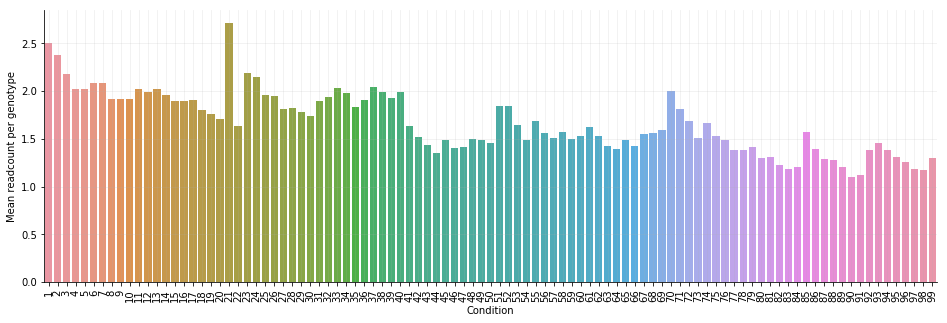

In [14]:
mean_count_df = mdf.groupby('Condition').agg('mean').reset_index()

fig, ax = plt.subplots(figsize = (16, 5))

sns.barplot(
    x = 'Condition',
    y = 'Count',
    data = mean_count_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.ylabel('Mean readcount per genotype')

plt.xticks(rotation = 90);

## cond-specific frequency distribution

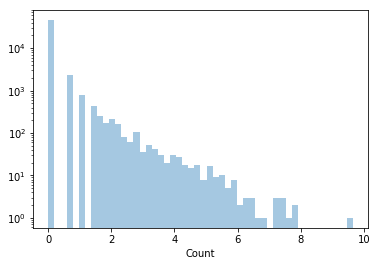

In [18]:
dfs = mdf[mdf['Condition'] == 1]

sns.distplot(
    np.log(dfs['Count']),
    kde = False,
)
plt.yscale('log')


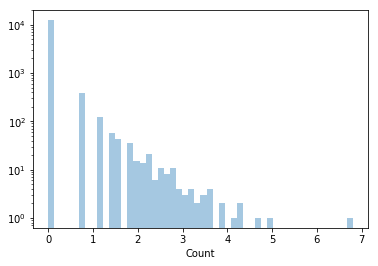

In [19]:
dfs = mdf[mdf['Condition'] == 99]

sns.distplot(
    np.log(dfs['Count']),
    kde = False,
)
plt.yscale('log')


In [77]:
dfs = mdf[mdf['Condition'] == 99]

sum(dfs['Count'])

17040

In [78]:
10 / 17040

0.0005868544600938967

In [104]:
sum(dfs[dfs['Count'] >= 10]['Count'])

2551

## Normalize by total readcount

In [20]:
total_readcounts = {
    1: 158290,
    2: 128003,
    3: 61639,
    4: 83302,
    5: 55225,
    6: 117018,
    7: 130831,
    8: 135113,
    9: 189374,
    10: 136577,
    11: 127959,
    12: 146091,
    13: 138911,
    14: 127808,
    15: 81110,
    16: 156964,
    17: 133065,
    18: 102666,
    19: 107724,
    20: 102759,
    21: 344149,
    22: 5131,
    23: 144081,
    24: 169259,
    25: 123398,
    26: 153336,
    27: 79017,
    28: 178121,
    29: 165535,
    30: 117649,
    31: 60765,
    32: 108940,
    33: 161974,
    34: 160491,
    35: 136831,
    36: 173714,
    37: 138256,
    38: 139364,
    39: 88715,
    40: 150183,
    41: 111451,
    42: 73490,
    43: 77992,
    44: 60898,
    45: 115144,
    46: 89276,
    47: 116143,
    48: 132923,
    49: 132255,
    50: 116212,
    51: 91768,
    52: 159170,
    53: 121959,
    54: 75887,
    55: 123218,
    56: 124401,
    57: 150312,
    58: 171759,
    59: 137521,
    60: 157076,
    61: 111349,
    62: 93801,
    63: 52992,
    64: 76529,
    65: 97413,
    66: 74155,
    67: 131531,
    68: 121948,
    69: 169176,
    70: 178119,
    71: 142866,
    72: 125835,
    73: 92785,
    74: 86186,
    75: 75996,
    76: 149299,
    77: 114479,
    78: 83457,
    79: 117069,
    80: 83599,
    81: 98402,
    82: 67856,
    83: 57088,
    84: 63736,
    85: 81684,
    86: 106740,
    87: 50572,
    88: 59412,
    89: 31729,
    90: 10179,
    91: 17265,
    92: 32216,
    93: 166460,
    94: 131924,
    95: 58707,
    96: 66639,
    97: 40996,
    98: 35962,
    99: 21296,
}

In [31]:
mean_count_df['Total readcount'] = list(total_readcounts.values())

In [32]:
mean_count_df['Adj. mean count'] = mean_count_df['Count'] / mean_count_df['Total readcount']

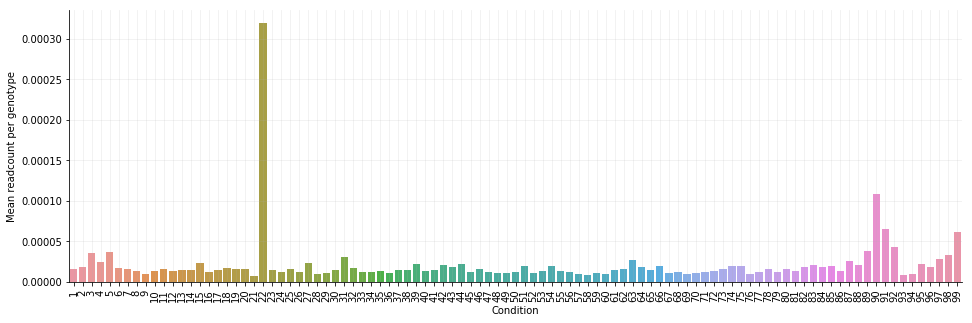

In [34]:
# mean_count_df = mdf.groupby('Condition').agg('mean').reset_index()

fig, ax = plt.subplots(figsize = (16, 5))

sns.barplot(
    x = 'Condition',
    y = 'Adj. mean count',
    data = mean_count_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.ylabel('Mean readcount per genotype')

plt.xticks(rotation = 90);

## skew and num. gts > threshold frequency

In [99]:
from collections import defaultdict

dd = defaultdict(list)
for nm in ddf:
    df = ddf[nm]
    
    fqs = df['Count'] / sum(df['Count'])
    
    dd['Name'].append(nm)
    dd['Skew'].append(skew(fqs))
    dd['Num. genotypes above 10 reads'].append(sum(df['Count'] > 10))
    dd['Num. genotypes above 0.1 pct'].append(sum(fqs > 0.001))
    dd['Num. genotypes above 0.01 pct'].append(sum(fqs > 0.0001))
    dd['Num. genotypes above 1 pct'].append(sum(fqs > 0.01))
    dd['Max frequency'].append(max(fqs))

stats_df = pd.DataFrame(dd)

stats_df['Regime'] = design_df['Regime']
stats_df['Name and regime'] = stats_df['Name'].astype(str) + ' ' + stats_df['Regime']
display(stats_df)

stats_df.to_csv(parent_script.out_dir + f'stats_jupyter.csv')

,Name,Skew,Num. genotypes above 10 reads,Num. genotypes above 0.1 pct,Num. genotypes above 0.01 pct,Num. genotypes above 1 pct,Max frequency,Regime,Name and regime
0,1,183.321741,612,76,531,10,0.121985,Low Stringency PANCE 1,1 Low Stringency PANCE 1
1,2,165.372168,523,80,523,8,0.112946,Low Stringency PANCE 1,2 Low Stringency PANCE 1
2,3,121.094051,279,71,625,7,0.114538,Low Stringency PANCE 1,3 Low Stringency PANCE 1
3,4,142.047987,351,70,567,6,0.094559,Low Stringency PANCE 1,4 Low Stringency PANCE 1
4,5,116.073099,257,66,581,7,0.100717,Low Stringency PANCE 1,5 Low Stringency PANCE 1
5,6,154.092968,505,61,548,5,0.089272,Low Stringency PANCE 1,6 Low Stringency PANCE 1
6,7,166.658772,555,59,555,5,0.091382,Low Stringency PANCE 1,7 Low Stringency PANCE 1
7,8,184.832855,560,52,560,4,0.087435,Low Stringency PANCE 1,8 Low Stringency PANCE 1
8,9,225.543400,785,52,528,3,0.082695,Low Stringency PANCE 1,9 Low Stringency PANCE 1
9,10,153.503746,594,58,594,3,0.063023,Low Stringency PANCE 1,10 Low Stringency PANCE 1


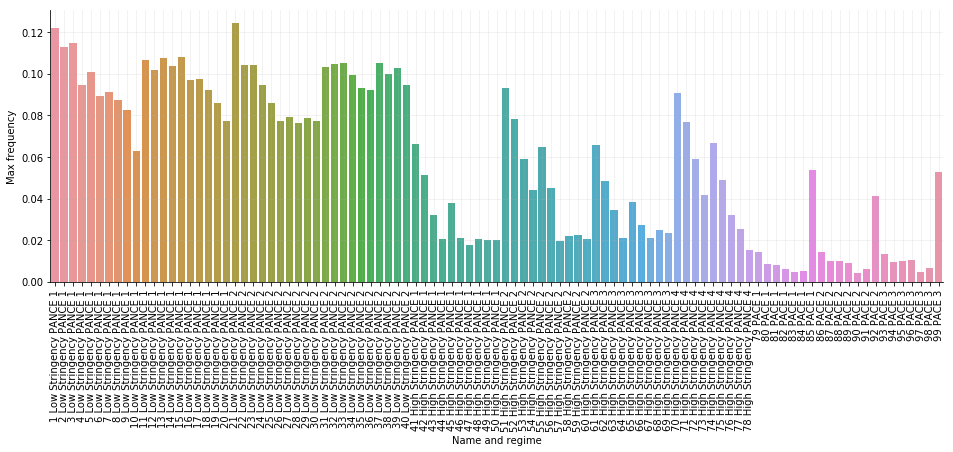

In [100]:
fig, ax = plt.subplots(figsize = (16, 5))

sns.barplot(
    x = 'Name and regime',
    y = 'Max frequency',
    data = stats_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.xticks(rotation = 90);

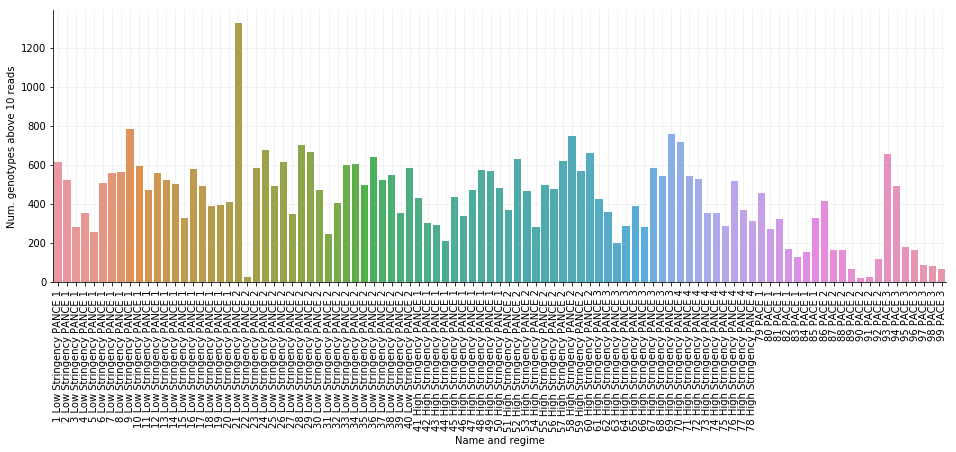

In [75]:
fig, ax = plt.subplots(figsize = (16, 5))

sns.barplot(
    x = 'Name and regime',
    y = 'Num. genotypes above 10 reads',
    data = stats_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.xticks(rotation = 90);

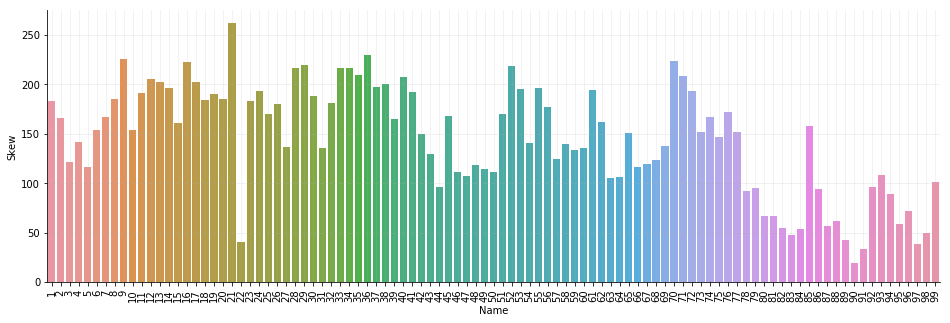

In [54]:
fig, ax = plt.subplots(figsize = (16, 5))

sns.barplot(
    x = 'Name',
    y = 'Skew',
    data = stats_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.xticks(rotation = 90);

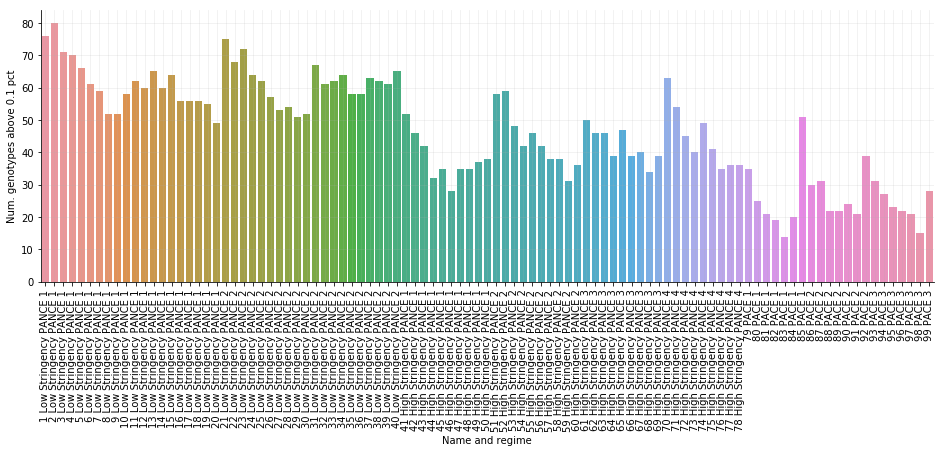

In [76]:
fig, ax = plt.subplots(figsize = (16, 5))

sns.barplot(
    x = 'Name and regime',
    y = 'Num. genotypes above 0.1 pct',
    data = stats_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.xticks(rotation = 90);

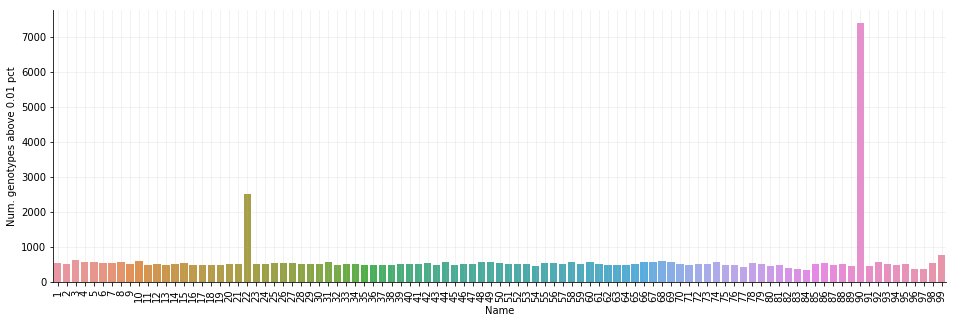

In [59]:
fig, ax = plt.subplots(figsize = (16, 5))

sns.barplot(
    x = 'Name',
    y = 'Num. genotypes above 0.01 pct',
    data = stats_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.xticks(rotation = 90);

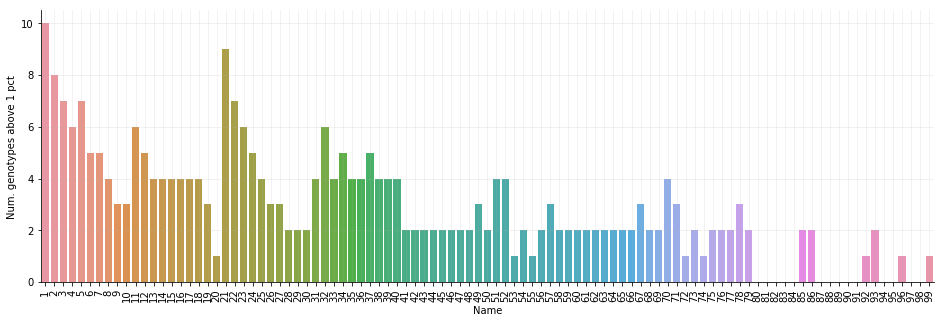

In [61]:
fig, ax = plt.subplots(figsize = (16, 5))

sns.barplot(
    x = 'Name',
    y = 'Num. genotypes above 1 pct',
    data = stats_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.xticks(rotation = 90);

## cumulative statistics

In [91]:
from collections import defaultdict

dd = defaultdict(list)
for nm in ddf:
    df = ddf[nm]
    
    fqs = df['Count'] / sum(df['Count'])
    sfqs = sorted(fqs, reverse = True)
    
#     thresholds = [.5, .75, .95, .99, .999]
    thresholds = [.5]
    idxs = {t: len(sfqs) for t in thresholds}
    for idx in range(len(sfqs)): 
        for t in thresholds:
            if sum(sfqs[:idx + 1]) >= t:
                if idx < idxs[t]:
                    idxs[t] = idx
        if sum(sfqs[:idx + 1]) > max(thresholds):
            break
    
    dd['Name'].append(nm)
    for t in thresholds:
        dd[f'Num. genotypes for cumulative {t}'].append(idxs[t])
    print(nm)
    
c_stats_df = pd.DataFrame(dd)
display(c_stats_df)

c_stats_df['Regime'] = design_df['Regime']
c_stats_df['Name and regime'] = c_stats_df['Name'].astype(str) + ' ' + c_stats_df['Regime']

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


,Name,Num. genotypes for cumulative 0.5
0,1,363
1,2,467
2,3,552
3,4,1402
4,5,943
5,6,1440
6,7,1611
7,8,3464
8,9,5063
9,10,3678


NameError: name 'exp_design' is not defined

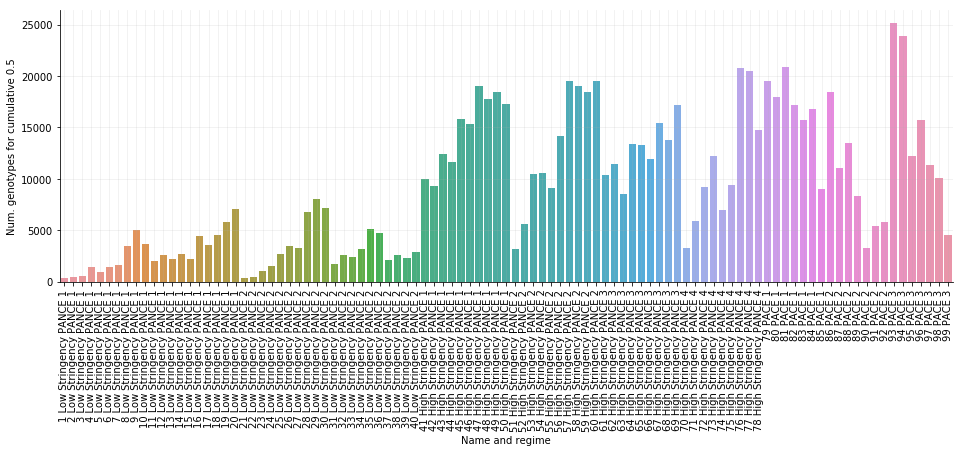

In [97]:
fig, ax = plt.subplots(figsize = (16, 5))

sns.barplot(
    x = 'Name and regime',
    y = 'Num. genotypes for cumulative 0.5',
    data = c_stats_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.xticks(rotation = 90);

In [98]:
c_stats_df.to_csv(parent_script.out_dir + f'cumulative_50pct.csv')